State Farm Distracted Drivers
=============

Prev Exercises: Udacity:DeepLearning:TensorFlow:notMNIST  
rename notebook to img_02_fit_lgtRgrSkl_SFDD to differentiate from lgtRgrTf

Fit Logistic Regression (sklearn)
------------


In [1]:
import pprint
import sys
print sys.version

2.7.11 (default, Jan 28 2016, 14:07:46) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]


In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

## Analytics Specs

#### This Project

In [225]:
#print sys.path
# print os.getcwd()
# sys.path.append(os.getcwd())
%run img_glbSpec_SFDD.py

imported img_glbSpec_SFDD


In [227]:
#print 'glbDataFile: %s' % (glbDataFile)
print 'glbRspClass: %s' % (glbRspClass)
print 'glbRspClassN: %d' % (glbRspClassN)
print 'glbRspClassDesc: '; print(glbRspClassDesc)

print 'glbPickleFile: %s' % (glbPickleFile)

glbRspClass: ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
glbRspClassN: 10
glbRspClassDesc: 
{'c9': 'talking to passenger', 'c8': 'hair and makeup', 'c3': 'texting - left', 'c2': 'talking on the phone - right', 'c1': 'texting - right', 'c0': 'normal driving', 'c7': 'reaching behind', 'c6': 'drinking', 'c5': 'operating the radio', 'c4': 'talking on the phone - left'}
glbPickleFile: {'models': 'data/img_M_SFDD_ImgSz_32.pickle', 'data': 'data/img_D_SFDD_ImgSz_32.pickle'}


In [79]:
with open(glbPickleFile['data'], 'rb') as f:
  save = pickle.load(f)

  glbObsFitIdn = save['glbObsFitIdn']
  glbObsFitFtr = save['glbObsFitFtr']
  glbObsFitRsp = save['glbObsFitRsp']

  glbObsVldIdn = save['glbObsVldIdn']
  glbObsVldFtr = save['glbObsVldFtr']
  glbObsVldRsp = save['glbObsVldRsp']

  glbObsTrnIdn = save['glbObsTrnIdn']
  glbObsTrnFtr = save['glbObsTrnFtr']
  glbObsTrnRsp = save['glbObsTrnRsp']

  glbObsNewIdn = save['glbObsNewIdn']
  glbObsNewFtr = save['glbObsNewFtr']
  glbObsNewRsp = save['glbObsNewRsp']

  del save  # hint to help gc free up memory
    
  print('Fit set:', len(glbObsFitIdn), glbObsFitFtr.shape, glbObsFitRsp.shape)
  print('Vld set:', len(glbObsVldIdn), glbObsVldFtr.shape, glbObsVldRsp.shape)
  print('Trn set:', len(glbObsTrnIdn), glbObsTrnFtr.shape, glbObsTrnRsp.shape)    
  print('New set:', len(glbObsNewIdn), glbObsNewFtr.shape, glbObsNewRsp.shape)

('Fit set:', 17940, (17940, 32, 32), (17940,))
('Vld set:', 4484, (4484, 32, 32), (4484,))
('Trn set:', 22424, (22424, 32, 32), (22424,))
('New set:', 79726, (79726, 32, 32), (79726,))


---
Fit Logistic Regression (sklearn) as a baseline
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [20]:

# print glbObsTrnFtr[0:3,:,:]
# print np.reshape(glbObsTrnFtr[0:3,:,:], (3, glbObsTrnFtr.shape[1] * glbObsTrnFtr.shape[2]))
# print np.reshape(glbObsTrnFtr[0:3,:,:], (3, glbObsTrnFtr.shape[1] * glbObsTrnFtr.shape[2])).shape


In [26]:
from sklearn import metrics, linear_model
import pandas as pd
from datetime import datetime, time

In [42]:
print (glbObsNewRsp > -1).any()

False


In [197]:
def mygetMetricLogLoss(lclRspPredProba, lclRsp):
    lclRspIndicator = np.zeros_like(lclRspPredProba)
    #print glbObsVldRsp[10]
    for cls in xrange(lclRspIndicator.shape[1]):
        lclRspIndicator[lclRsp == cls, cls] = 1

#     print np.unique(glbObsVldRsp, return_counts = True)
#     print tmpObsVldRspIndicator.sum(axis = 0)
#     print (tmpObsVldRspIndicator.sum(axis = 0) == np.unique(glbObsVldRsp, return_counts = True)[1])
    #tmpObsVldRspIndicator[glbObsVldRsp == 3, 3] = 1
    #tmpObsVldRspIndicator[0, glbObsVldRsp[0]]
#     print lclRspIndicator[10:16, :]

    # Scale proba to sum to 1 for each row
    tmpRspPredProba = lclRspPredProba
    sclRspPredProbaRowSum = tmpRspPredProba.sum(axis = 1)
    # print np.abs(sclObsVldRspPredProbaRowSum - 1.0)[10:16]
    # print 1e-05
    # print np.abs(sclObsVldRspPredProbaRowSum - 1.0)[10:16] > 1e-05
    sclRspPredProbaRowSumChk = (np.abs(sclRspPredProbaRowSum - 1.0) > 1e-15)
    if (sclRspPredProbaRowSumChk.sum() > 0):
        print 'row sums != 1 for %d obs' % (sclRspPredProbaRowSumChk.sum())
        print sclRspPredProbaRowSum[sclRspPredProbaRowSumChk]
        #print sclObsVldRspPredProbaRowSum[10:16]    
        sclRspPredProba = tmpRspPredProba / sclRspPredProbaRowSum
        tmpRspPredProba = sclRspPredProba
        
    # Bound proba to limit log fn outliers
    bndRspPredProba = tmpRspPredProba
    bndRspPredProba[bndRspPredProba > 1-1e-15] = 1-1e-15
    bndRspPredProba[bndRspPredProba < 0+1e-15] = 0+1e-15
    #print bndObsVldRspPredProba[10:16, :]    
    nModProba = (tmpRspPredProba != bndRspPredProba).sum()
    if (nModProba > 0):
        print 'minmax of probabilities modified %d cells' % (nModProba)
    tmpRspPredProba = bndRspPredProba    
    
    #print (lclRspIndicator * np.log(tmpRspPredProba))[10:16]
    
    logLoss = 0 - ((lclRspIndicator * np.log(tmpRspPredProba)).sum() / 
                                        tmpRspPredProba.shape[0])
    return(logLoss)

print mygetMetricLogLoss(glbObsVldRspPredProba, glbObsVldRsp)
print metrics.log_loss(glbObsVldRsp, glbObsVldRspPredProba)

0.150834867853
0.150834867853


In [209]:
def fitMdlLgtRgrSkl(lclObsFitFtr, lclObsFitRsp, nObsFit = 50, verbose = True):
    print('\nLogistic Regression (sklearn): nObsFit: %5d; ' % ( \
            nObsFit))
    
    startTm = datetime.now()

    mdlDf = pd.DataFrame({'id': 'LogisticRegression.sklearn',
                            'nObsFit': [nObsFit]
                         })
    
    mdl = linear_model.LogisticRegression(verbose = verbose)
    mdl.fit(np.reshape(lclObsFitFtr[0:nObsFit,:,:], \
                            (nObsFit, lclObsFitFtr.shape[1] * lclObsFitFtr.shape[2])), \
                 lclObsFitRsp[0:nObsFit])
    
    mdlDf['model'] = mdl
    
    lclObsFitRspPred = mdl.predict(np.reshape(lclObsFitFtr[0:nObsFit,:,:], \
                                                    (nObsFit               , glbImgSz ** 2)))
    lclObsFitRspPredProba = mdl.predict_proba(np.reshape(lclObsFitFtr[0:nObsFit,:,:], \
                                                    (nObsFit               , glbImgSz ** 2)))    
    accFit = metrics.accuracy_score(lclObsFitRspPred, lclObsFitRsp[0:nObsFit])
    logLossFit = metrics.log_loss(lclObsFitRsp[0:nObsFit], lclObsFitRspPredProba)
    if verbose:
        print '\n  Fit accuracy:%0.4f' % (accFit)
        print '\n   Fit logLoss:%0.4f' % (logLossFit)        
#         print metrics.confusion_matrix(glbObsFitRsp[0:nObsFit], lclObsFitRspPred)

    lclObsVldRspPred = mdl.predict(np.reshape(glbObsVldFtr               , \
                                                    (glbObsVldFtr.shape[0] , glbImgSz ** 2)))
    lclObsVldRspPredProba = mdl.predict_proba(np.reshape(glbObsVldFtr               , \
                                                    (glbObsVldFtr.shape[0] , glbImgSz ** 2)))
    mdlDf['accVld'] = accVld = metrics.accuracy_score(lclObsVldRspPred, glbObsVldRsp)
    mdlDf['logLossVld'] = logLossVld = metrics.log_loss(glbObsVldRsp, lclObsVldRspPredProba)    
    if verbose:
        print '\n  Vld accuracy:%0.4f' % (accVld)
        print '\n   Vld logLoss:%0.4f' % (logLossVld)        
        print metrics.confusion_matrix(glbObsVldRsp, lclObsVldRspPred)

    lclObsNewRspPred = mdl.predict(np.reshape(glbObsNewFtr               , \
                                                    (glbObsNewFtr.shape[0] , glbImgSz ** 2)))
    lclObsNewRspPredProba = mdl.predict_proba(np.reshape(glbObsNewFtr               , \
                                                    (glbObsNewFtr.shape[0] , glbImgSz ** 2)))
    if (glbObsNewRsp > -1).any():
        mdlDf['accNew'] = accNew = metrics.accuracy_score(lclObsNewRspPred, glbObsNewRsp)
        mdlDf['logLossNew'] = logLossNew = metrics.log_loss(glbObsNewRsp, lclObsNewRspPredProba)        
        if verbose:
            print '\n  New accuracy:%0.4f' % (accNew)
            print '\n  New  logLoss:%0.4f' % (logLossNew)            
            print metrics.confusion_matrix(glbObsNewRsp, lclObsNewRspPred)
    
    clsKntDct = {'clsKnt' : np.unique(lclObsNewRspPred, return_counts = True)}
    #mdlDf.ix[0, 'predNew'] = clsKntDct
    mdlDf['predNew'] = None
    mdlDf.set_value(0, 'predNew', clsKntDct)
    #print type(clsKntDct)
    if verbose:
        print '\n  New prediction knts:'
#         print type(mdlDf['predNew'])
#         print mdlDf['predNew'].shape        
#         print type(mdlDf['predNew'][0])  
        print mdlDf['predNew'][0]
#         print type(mdlDf['predNew'][0]['predNew'])        
        #pprint.pprint(mdlDf['predNew']['predNew'])
    
#     valid_pred_labels = mdl.predict(np.reshape(glbObsVldFtr, \
#                                                     (glbObsVldFtr.shape[0], glbImgSz ** 2)))
#     accuracy_valid = metrics.accuracy_score(valid_pred_labels, glbObsVldRsp)
#     print '  accuracy valid:%0.4f' % (accuracy_valid)
#     print metrics.confusion_matrix(glbObsVldRsp           , valid_pred_labels)

#     test_pred_labels  = mdl.predict(np.reshape(glbObsNewFtr, \
#                                                     (glbObsNewFtr.shape[0], glbImgSz ** 2)))
#     accuracy_test = metrics.accuracy_score( test_pred_labels,  glbObsNewRsp)
#     print '  accuracy  test:%0.4f' % (accuracy_test)
#     test_conf = pd.DataFrame(metrics.confusion_matrix( glbObsNewRsp,  test_pred_labels), \
#                              index = dspLabels, columns = dspLabels)
#     print test_conf
    
#     return(mdl, (accFit, accuracy_valid, accuracy_test))

#     print mdl.get_params()
#     print mdl.coef_.shape
#     print '  coeff stats:'
#     for lblIx in xrange(len(dspLabels)):
#         print '  label:%s; minCoeff:row:%2d, col:%2d, value:%0.4f; maxCoeff:row:%2d, col:%2d, value:%0.4f;' % \
#             (dspLabels[lblIx], \
#              mdl.coef_[lblIx,:].argmin() / glbImgSz, \
#              mdl.coef_[lblIx,:].argmin() % glbImgSz, \
#              mdl.coef_[lblIx,:].min(), \
#              mdl.coef_[lblIx,:].argmax() / glbImgSz, \
#              mdl.coef_[lblIx,:].argmax() % glbImgSz, \
#              mdl.coef_[lblIx,:].max())


    mdlDf['elapsedSecs'] = (datetime.now() - startTm).seconds  
    print('  elapsed: %.2d seconds' % (mdlDf['elapsedSecs'][0]))  
    
    return(mdlDf)
    
mdlDf = fitMdlLgtRgr(glbObsFitFtr, glbObsFitRsp, nObsFit = 100, verbose = True)
mdlDf = mdlDf.append(fitMdlLgtRgr(glbObsTrnFtr, glbObsTrnRsp, nObsFit = 1000))
# To check if model results are deterministic
mdlDf = mdlDf.append(fitMdlLgtRgr(glbObsTrnFtr, glbObsTrnRsp, nObsFit = 1000))
print '\nmdlDf: '
print(mdlDf)


Logistic Regression: nObsFit:   100; 
[LibLinear]
  Fit accuracy:1.0000

   Fit logLoss:0.3983

  Vld accuracy:0.3287

   Vld logLoss:2.2991
[[241  40  45  45  18   4  26   9  36  17]
 [ 29  98 116  33   0   1  50  19  79  43]
 [  6  24 247  26   0  12  40  41  39  15]
 [123  23  28 165  35   4   4   0  40  31]
 [115  41  29 111  65   9  31   1  36  33]
 [ 21  31  98  51   4 134  62   3  49  13]
 [  4  34 144   4   0  20 146   1  86  19]
 [  0  41  92  16   0  14  58  93  60  26]
 [ 16  12 115  15   9   3  58  25 110  32]
 [ 53  10  55  51   0   6  40  13  39 175]]

  New prediction knts:
{'clsKnt': (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 9347,  6305, 13535,  6527,  2314,  4400, 12156,  2484, 13210,  9448]))}
  elapsed: 02 seconds

Logistic Regression: nObsFit:  1000; 
[LibLinear]
  Fit accuracy:0.9790

   Fit logLoss:0.3909

  Vld accuracy:0.8597

   Vld logLoss:0.6779
[[387  19  11   7  16   2   4   2   7  26]
 [  5 408  24   1   3   2  10   5   2   8]
 [  8   9

In [33]:
# def fitMdl(nObsFit = 50):
#     mdl = linear_model.LogisticRegression(verbose = 1)
#     mdl.fit(np.reshape(glbObsTrnFtr[0:nObsFit,:,:], \
#                             (nObsFit, glbObsTrnFtr.shape[1] * glbObsTrnFtr.shape[2])), \
#                  glbObsTrnRsp[0:nObsFit])
#     print mdl.get_params()
#     print mdl.coef_.shape
#     print '  coeff stats:'
#     for lblIx in xrange(len(dspLabels)):
#         print '  label:%s; minCoeff:row:%2d, col:%2d, value:%0.4f; maxCoeff:row:%2d, col:%2d, value:%0.4f;' % \
#             (dspLabels[lblIx], \
#              mdl.coef_[lblIx,:].argmin() / glbImgSz, \
#              mdl.coef_[lblIx,:].argmin() % glbImgSz, \
#              mdl.coef_[lblIx,:].min(), \
#              mdl.coef_[lblIx,:].argmax() / glbImgSz, \
#              mdl.coef_[lblIx,:].argmax() % glbImgSz, \
#              mdl.coef_[lblIx,:].max())

#     lclObsFitRspPred = mdl.predict(np.reshape(glbObsTrnFtr[0:nObsFit,:,:], \
#                                                     (nObsFit               , glbImgSz ** 2)))
#     accFit = metrics.accuracy_score(lclObsFitRspPred, glbObsTrnRsp[0:nObsFit])
#     print '  accuracy train:%0.4f' % (accFit)
#     print metrics.confusion_matrix(glbObsTrnRsp[0:nObsFit], lclObsFitRspPred)

#     valid_pred_labels = mdl.predict(np.reshape(glbObsVldFtr, \
#                                                     (glbObsVldFtr.shape[0], glbImgSz ** 2)))
#     accuracy_valid = metrics.accuracy_score(valid_pred_labels, glbObsVldRsp)
#     print '  accuracy valid:%0.4f' % (accuracy_valid)
#     print metrics.confusion_matrix(glbObsVldRsp           , valid_pred_labels)

#     test_pred_labels  = mdl.predict(np.reshape(glbObsNewFtr, \
#                                                     (glbObsNewFtr.shape[0], glbImgSz ** 2)))
#     accuracy_test = metrics.accuracy_score( test_pred_labels,  glbObsNewRsp)
#     print '  accuracy  test:%0.4f' % (accuracy_test)
#     test_conf = pd.DataFrame(metrics.confusion_matrix( glbObsNewRsp,  test_pred_labels), \
#                              index = dspLabels, columns = dspLabels)
#     print test_conf
    
#     return(mdl, (accFit, accuracy_valid, accuracy_test))

In [81]:
try:
    glbMdlDf = pd.read_pickle(glbPickleFile['models'])
except IOError, e:
    print(e)    
    if e.errno == 2:    
        glbMdlDf = pd.DataFrame()
    else:
        raise
print(glbMdlDf)

[Errno 2] No such file or directory: 'data/img_M_SFDD_ImgSz_32.pickle'
Empty DataFrame
Columns: []
Index: []


In [210]:
#glbMdlDf = pd.DataFrame()

In [211]:
nObsFitSearch = [100, 1000, 5000, 10000, glbObsFitFtr.shape[0]]

for nObsFit in nObsFitSearch:
    if (glbMdlDf.shape[0] == 0) or \
       (glbMdlDf[(glbMdlDf.nObsFit == nObsFit )].shape[0] == 0):
        mdlDf = fitMdlLgtRgr(glbObsFitFtr, glbObsFitRsp, nObsFit = nObsFit, verbose = False)
        glbMdlDf = glbMdlDf.append(mdlDf)        
#fitMdlLgtRgr(nObsFit, verbose = False)


Logistic Regression: nObsFit:   100; 
  elapsed: 01 seconds

Logistic Regression: nObsFit:  1000; 
  elapsed: 06 seconds

Logistic Regression: nObsFit:  5000; 
  elapsed: 37 seconds

Logistic Regression: nObsFit: 10000; 
  elapsed: 83 seconds

Logistic Regression: nObsFit: 17940; 
  elapsed: 166 seconds


In [212]:
def mydspMdls(glbMdlDf):
    glbMdlDf = (glbMdlDf
                .set_index(['nObsFit'], 
                           drop = False)
                .sort_values('accVld')
                )
    print(glbMdlDf)
    return(glbMdlDf)

glbMdlDf = mydspMdls(glbMdlDf)

                                 id  nObsFit  \
nObsFit                                        
100      sklearn.LogisticRegression      100   
1000     sklearn.LogisticRegression     1000   
5000     sklearn.LogisticRegression     5000   
10000    sklearn.LogisticRegression    10000   
17940    sklearn.LogisticRegression    17940   

                                                     model    accVld  \
nObsFit                                                                
100      LogisticRegression(C=1.0, class_weight=None, d...  0.328724   
1000     LogisticRegression(C=1.0, class_weight=None, d...  0.836084   
5000     LogisticRegression(C=1.0, class_weight=None, d...  0.936664   
10000    LogisticRegression(C=1.0, class_weight=None, d...  0.956512   
17940    LogisticRegression(C=1.0, class_weight=None, d...  0.969670   

         logLossVld                                            predNew  \
nObsFit                                                                  
100       

In [213]:
def mysaveMdls():
    try:
        glbMdlDf.to_pickle(glbPickleFile['models'])
    except Exception, e:
        print(e)    
        raise

    print 'Compressed pickle file: %s; size: %d KB'% (glbPickleFile['models'], 
                                    os.stat(glbPickleFile['models']).st_size / 1024)
    
mysaveMdls()    

Compressed pickle file: data/img_M_SFDD_ImgSz_32.pickle; size: 404 KB


In [214]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects.lib import grid
from rpy2.robjects.lib import ggplot2
import rpy2.robjects.pandas2ri

In [215]:
robjects.pandas2ri.activate()
glbMdlRDf = robjects.conversion.py2ri(glbMdlDf)
print(glbMdlRDf)

                              id nObsFit
100   sklearn.LogisticRegression     100
1000  sklearn.LogisticRegression    1000
5000  sklearn.LogisticRegression    5000
10000 sklearn.LogisticRegression   10000
17940 sklearn.LogisticRegression   17940
                                                                                                                                                                                                                                                                                model
100   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n          verbose=False, warm_start=False)
1000  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n          penalty='l2', random_state=No

In [218]:
pltRFn = robjects.r("""
    source('~/Dropbox/datascience/R/myplot.R')
    function(RDf) {
        mypltModelStats(RDf, c('accVld', 'logLossVld', 'elapsedSecs'), dim = c('nObsFit'), 
                        scaleXFn = NULL, highLightIx = which.min(RDf$logLossVld),
                        title = NULL, fileName = 'img_02_fit_lgtRgr_SFDD_MdlStats.png')
    }                        
""")    
pltRFn(glbMdlRDf)

<ListVector - Python:0x10fa71b48 / R:0x7ff1df9b7b58>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
<ListVector - Python:0x10fa71b48 / R:0x7ff1df9b7b58>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
<ListVector - Python:0x10fa71b48 / R:0x7ff1df9b7b58>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
  scales: <class 'rpy2.robjects.environments.Environment'>
  <Environment - Python:0x10ba5f0e0 / R:0x7ff1f54b6ed0>
  ...
<ListVector - Python:0x10fa71b48 / R:0x7ff1df9b7b58>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
  layers: <class 'rpy2.robjects.environments.Environment'>
  <Environment - Python:0x10be001b8 / R:0x7ff1e0181878>
<ListVector - Python:0x10fa71b48 / R:0x7ff1df9b7b58>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]

In [219]:
pltAccRFn = robjects.r("""
    function(RDf) {
        mypltModelStats(RDf, c('accVld', 'logLossVld'), dim = c('nObsFit'), 
                        scaleXFn = NULL, highLightIx = which.min(RDf$logLossVld),
                        title = NULL, fileName = 'img_02_fit_lgtRgr_SFDD_MdlAccrcy.png')
    }                        
""")    
pltAccRFn(glbMdlRDf)

<ListVector - Python:0x10bdfaea8 / R:0x7ff1d283c158>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
<ListVector - Python:0x10bdfaea8 / R:0x7ff1d283c158>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
<ListVector - Python:0x10bdfaea8 / R:0x7ff1d283c158>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
  scales: <class 'rpy2.robjects.environments.Environment'>
  <Environment - Python:0x10bdfa680 / R:0x7ff1e9c93440>
  ...
<ListVector - Python:0x10bdfaea8 / R:0x7ff1d283c158>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
  layers: <class 'rpy2.robjects.environments.Environment'>
  <Environment - Python:0x10bdfa8c0 / R:0x7ff1f508fa00>
<ListVector - Python:0x10bdfaea8 / R:0x7ff1d283c158>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]

### Fit selected model on glbObsTrn

In [220]:
mdlFinDf = fitMdlLgtRgr(glbObsTrnFtr, glbObsTrnRsp, nObsFit = glbObsTrnFtr.shape[0], 
                     verbose = True)


Logistic Regression: nObsFit: 22424; 
[LibLinear]
  Fit accuracy:0.9851

   Fit logLoss:0.1462

  Vld accuracy:0.9839

   Vld logLoss:0.1508
[[470   2   1   1   1   0   3   0   2   1]
 [  1 463   2   0   0   0   0   2   0   0]
 [  1   2 444   0   1   0   1   1   0   0]
 [  0   1   1 449   2   0   0   0   0   0]
 [  0   0   0   3 465   0   2   0   1   0]
 [  3   0   0   0   0 462   1   0   0   0]
 [  1   3   0   1   1   0 451   0   0   1]
 [  0   0   1   0   1   0   1 396   1   0]
 [  1   0   1   2   1   0   1   4 382   3]
 [  3   0   0   0   0   0   0   2   7 430]]

  New prediction knts:
{'clsKnt': (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 5587,  9292,  8422,  7397,  6513,  9244,  6653,  6879, 13768,  5971]))}
  elapsed: 238 seconds


In [221]:
glbMdlDf = glbMdlDf.append(mdlFinDf)
#mdlFinDf = mdlDf

In [222]:
glbMdlDf = mydspMdls(glbMdlDf)
mysaveMdls()

                                 id  nObsFit  \
nObsFit                                        
100      sklearn.LogisticRegression      100   
1000     sklearn.LogisticRegression     1000   
5000     sklearn.LogisticRegression     5000   
10000    sklearn.LogisticRegression    10000   
17940    sklearn.LogisticRegression    17940   
22424    sklearn.LogisticRegression    22424   

                                                     model    accVld  \
nObsFit                                                                
100      LogisticRegression(C=1.0, class_weight=None, d...  0.328724   
1000     LogisticRegression(C=1.0, class_weight=None, d...  0.836084   
5000     LogisticRegression(C=1.0, class_weight=None, d...  0.936664   
10000    LogisticRegression(C=1.0, class_weight=None, d...  0.956512   
17940    LogisticRegression(C=1.0, class_weight=None, d...  0.969670   
22424    LogisticRegression(C=1.0, class_weight=None, d...  0.983943   

         logLossVld                   

### Predict ObsNew using mdlFinDf['model'] 

In [276]:
glbObsNewRspPred = mdlFinDf['model'][0].predict(np.reshape(glbObsNewFtr               , \
                                                    (glbObsNewFtr.shape[0] , glbImgSz ** 2)))
glbObsNewRspPredProba = mdlFinDf['model'][0].predict_proba(np.reshape(glbObsNewFtr               , \
                                                    (glbObsNewFtr.shape[0] , glbImgSz ** 2)))
print np.unique(glbObsNewRspPred, return_counts = True)
print np.unique(glbObsNewRspPred, return_counts = True)[1] * 1.0 / \
      np.unique(glbObsTrnRsp, return_counts = True)[1]
print glbObsNewRspPredProba[0:6]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 5587,  9292,  8422,  7397,  6513,  9244,  6653,  6879, 13768,  5971]))
[ 2.24467658  4.098809    3.63487268  3.15302643  2.80008598  3.9982699
  2.86150538  3.43606394  7.20460492  2.8046031 ]
[[  3.51677784e-04   1.42989881e-08   2.15615048e-01   2.49188102e-06
    6.44579011e-05   7.65132461e-01   1.84812326e-02   8.31239219e-05
    2.97239439e-06   2.66520267e-04]
 [  3.42425840e-04   7.60954307e-04   1.97683207e-02   4.87347758e-01
    1.54686028e-03   4.89841709e-01   1.12417886e-07   2.15663513e-04
    9.83989690e-05   7.77964015e-05]
 [  8.98362325e-01   1.17896311e-03   3.97399088e-04   1.03319360e-02
    4.20274744e-03   1.29633775e-04   1.71399680e-04   1.63751885e-04
    7.06033480e-03   7.80015091e-02]
 [  5.99243835e-02   9.22010235e-02   2.41183101e-02   5.57967797e-06
    1.15852688e-01   2.75680054e-04   6.97824901e-01   2.65295407e-05
    6.77151342e-03   2.99939148e-03]
 [  3.63062167e-04   2.11171389e-05   



Max Proba for cls: c0; desc: normal driving; proba: 0.9873; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_14203.jpg:


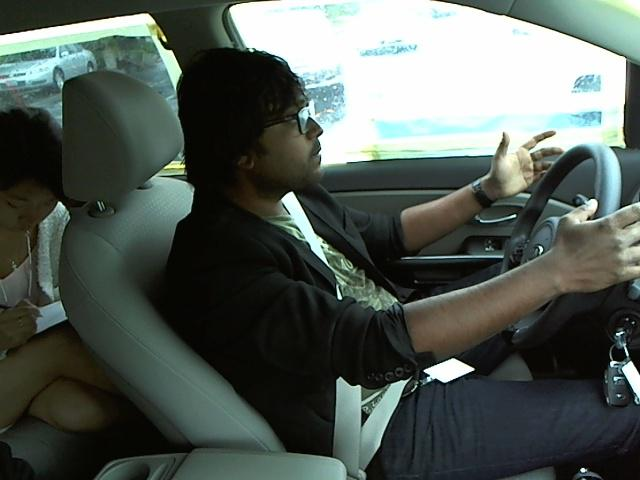

  Proba:
[ 0.9873  0.      0.001   0.0005  0.002   0.0014  0.0001  0.0002  0.0014
  0.006 ]
Min Proba for cls: c0; desc: normal driving; proba: 0.2087; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_38012.jpg:


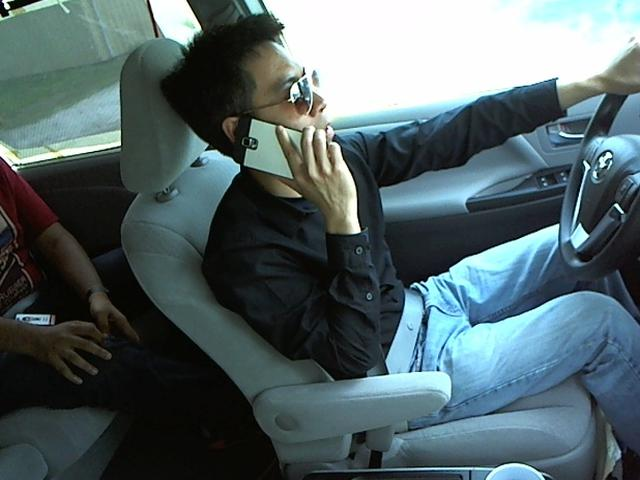

  Proba:
[ 0.2087  0.0001  0.1307  0.2022  0.1312  0.1205  0.0001  0.      0.
  0.2064]
  next best class: talking to passenger


Max Proba for cls: c1; desc: texting - right; proba: 0.9954; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_47548.jpg:


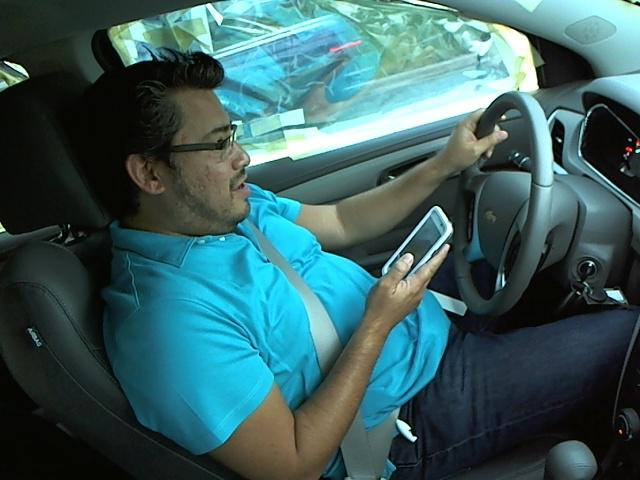

  Proba:
[ 0.      0.9954  0.      0.0002  0.0001  0.0002  0.0011  0.0008  0.001
  0.0012]
Min Proba for cls: c1; desc: texting - right; proba: 0.1965; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_2670.jpg:


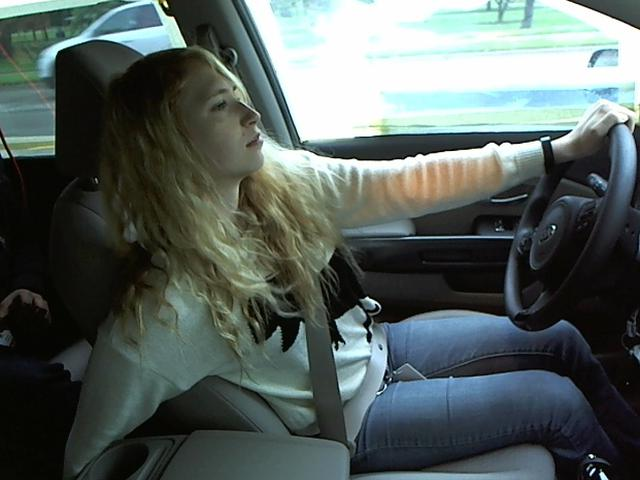

  Proba:
[ 0.1006  0.1965  0.1941  0.0001  0.      0.      0.0006  0.1861  0.1379
  0.1842]
  next best class: talking on the phone - right


Max Proba for cls: c2; desc: talking on the phone - right; proba: 0.9858; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_45163.jpg:


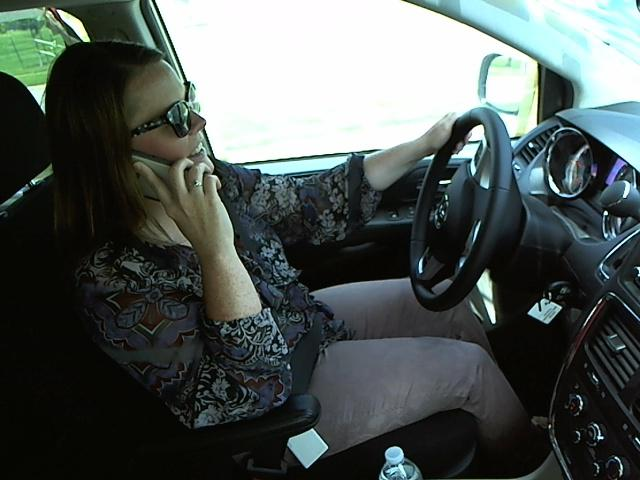

  Proba:
[ 0.0046  0.0023  0.9858  0.      0.0001  0.0024  0.0029  0.      0.0002
  0.0015]
Min Proba for cls: c2; desc: talking on the phone - right; proba: 0.2099; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_86122.jpg:


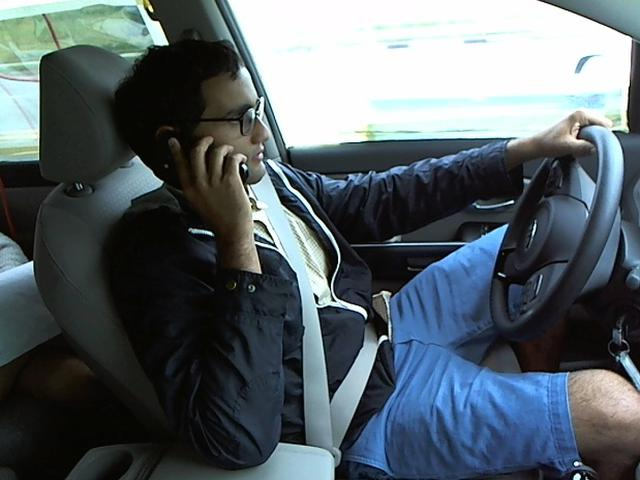

  Proba:
[ 0.1973  0.1918  0.2099  0.      0.      0.16    0.2054  0.      0.0357
  0.    ]
  next best class: drinking


Max Proba for cls: c3; desc: texting - left; proba: 0.9840; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_58618.jpg:


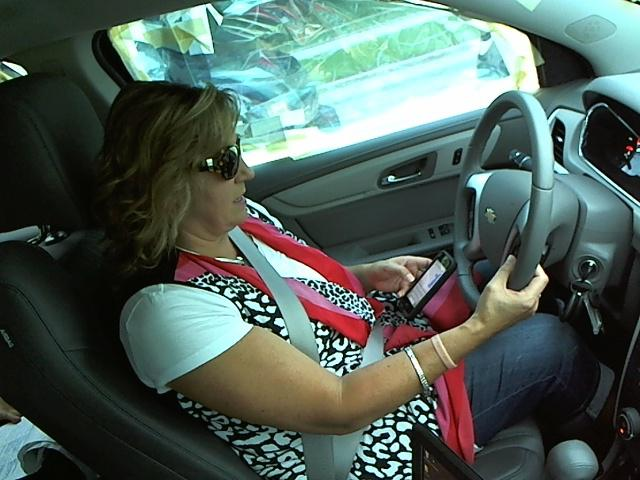

  Proba:
[ 0.0004  0.0007  0.0018  0.984   0.0028  0.001   0.0039  0.001   0.
  0.0043]
Min Proba for cls: c3; desc: texting - left; proba: 0.1992; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_79411.jpg:


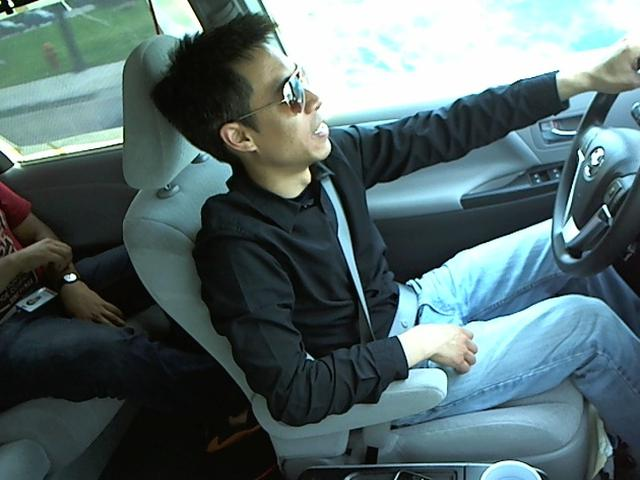

  Proba:
[ 0.1977  0.0001  0.1791  0.1992  0.0939  0.1849  0.      0.      0.
  0.1452]
  next best class: normal driving


Max Proba for cls: c4; desc: talking on the phone - left; proba: 0.9920; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_97899.jpg:


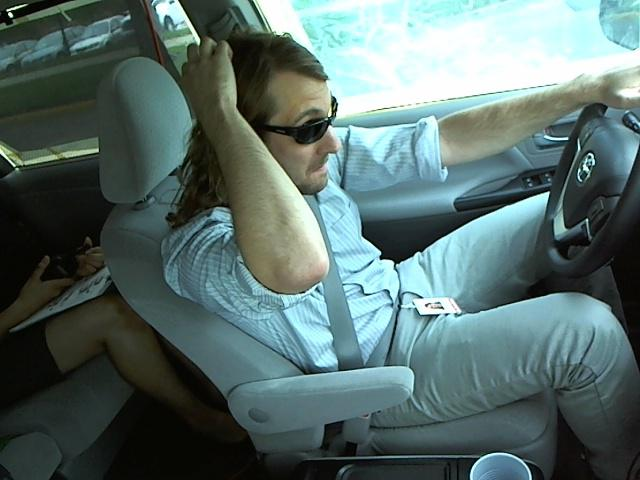

  Proba:
[ 0.0011  0.0005  0.      0.      0.992   0.0007  0.0002  0.0004  0.0043
  0.0008]
Min Proba for cls: c4; desc: talking on the phone - left; proba: 0.2017; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_10856.jpg:


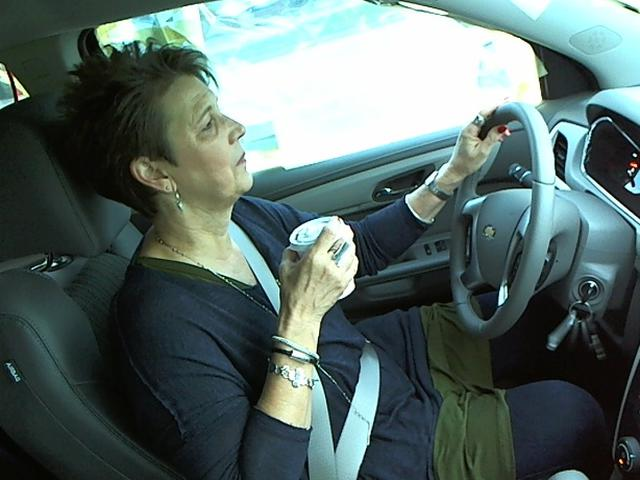

  Proba:
[ 0.1772  0.0032  0.0413  0.007   0.2017  0.0008  0.1067  0.1788  0.1375
  0.1457]
  next best class: reaching behind


Max Proba for cls: c5; desc: operating the radio; proba: 0.9986; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_15003.jpg:


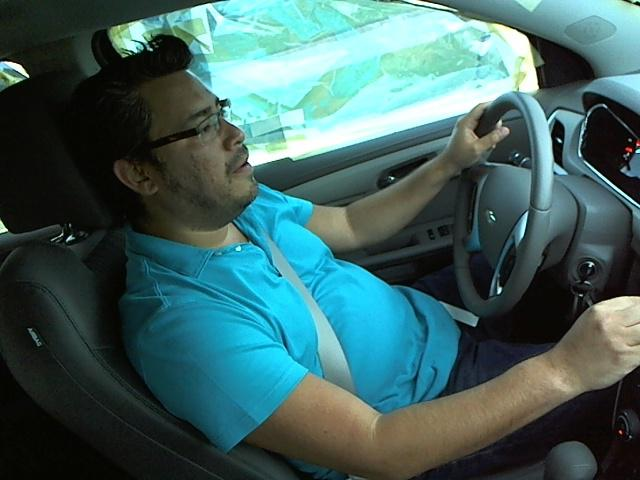

  Proba:
[ 0.      0.      0.0001  0.      0.      0.9986  0.0005  0.0003  0.0003
  0.0001]
Min Proba for cls: c5; desc: operating the radio; proba: 0.2049; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_61160.jpg:


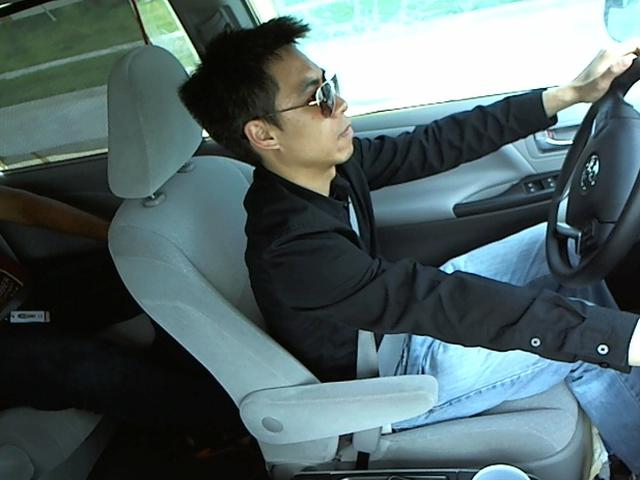

  Proba:
[ 0.0001  0.      0.1927  0.1533  0.192   0.2049  0.1815  0.      0.0116
  0.064 ]
  next best class: talking on the phone - right


Max Proba for cls: c6; desc: drinking; proba: 0.9903; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_26560.jpg:


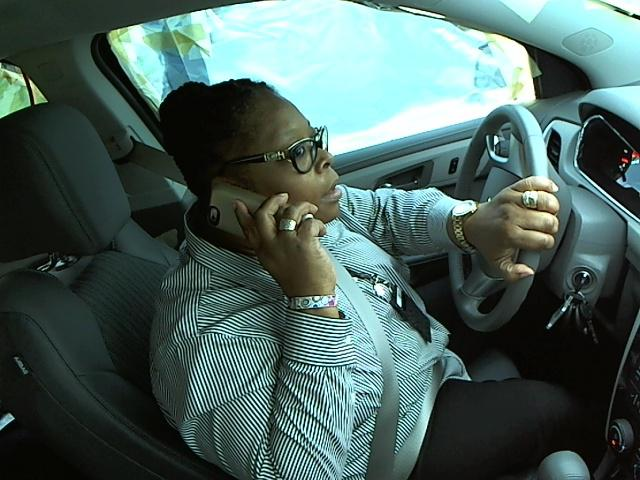

  Proba:
[ 0.      0.0017  0.0002  0.      0.0006  0.0004  0.9903  0.0023  0.0043
  0.0002]
Min Proba for cls: c6; desc: drinking; proba: 0.2153; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_68914.jpg:


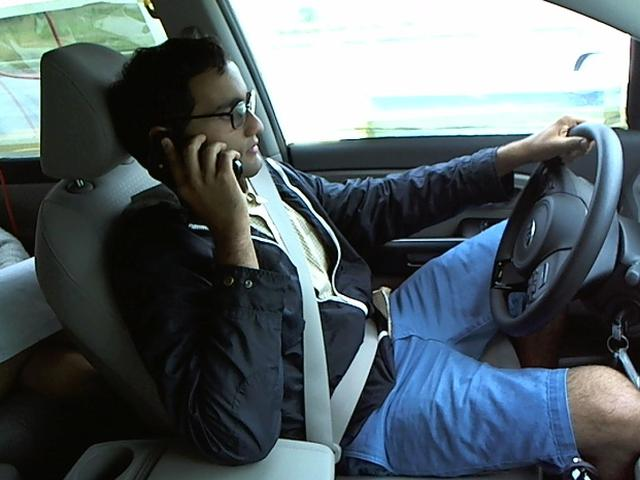

  Proba:
[ 0.2094  0.186   0.1745  0.      0.      0.1913  0.2153  0.      0.0235
  0.    ]
  next best class: normal driving


Max Proba for cls: c7; desc: reaching behind; proba: 0.9952; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_41838.jpg:


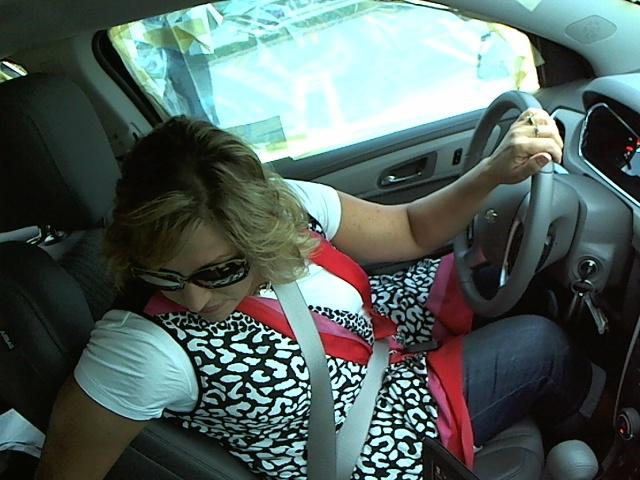

  Proba:
[ 0.0001  0.0001  0.0034  0.      0.0002  0.0001  0.0003  0.9952  0.0001
  0.0005]
Min Proba for cls: c7; desc: reaching behind; proba: 0.2119; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_23566.jpg:


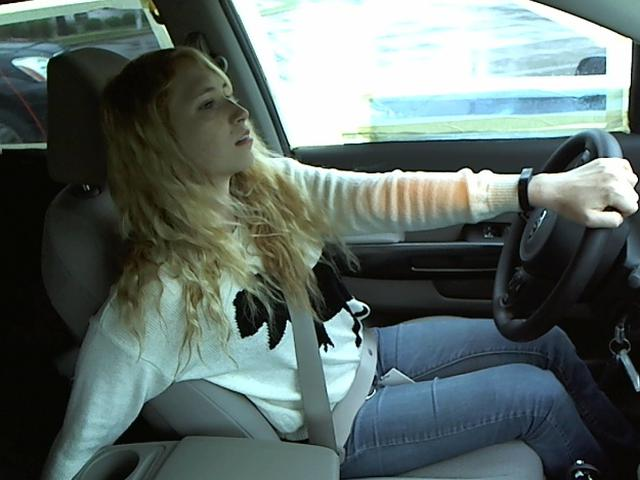

  Proba:
[ 0.1945  0.2115  0.0708  0.      0.      0.      0.0001  0.2119  0.1231
  0.1881]
  next best class: texting - right


Max Proba for cls: c8; desc: hair and makeup; proba: 0.9981; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_87743.jpg:


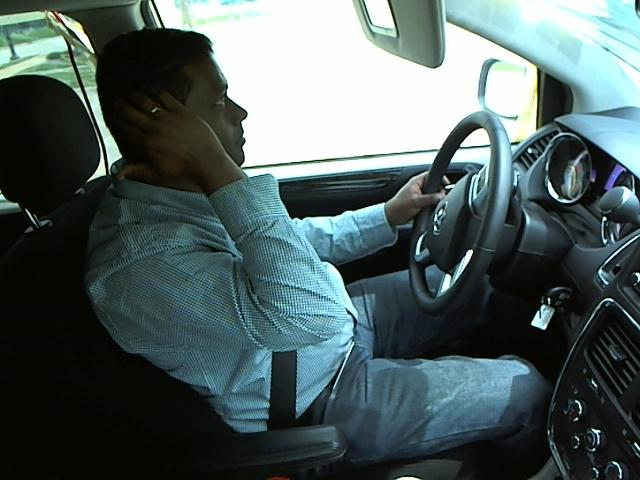

  Proba:
[ 0.      0.      0.0004  0.      0.0002  0.      0.001   0.0001  0.9981
  0.0002]
Min Proba for cls: c8; desc: hair and makeup; proba: 0.1971; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_92207.jpg:


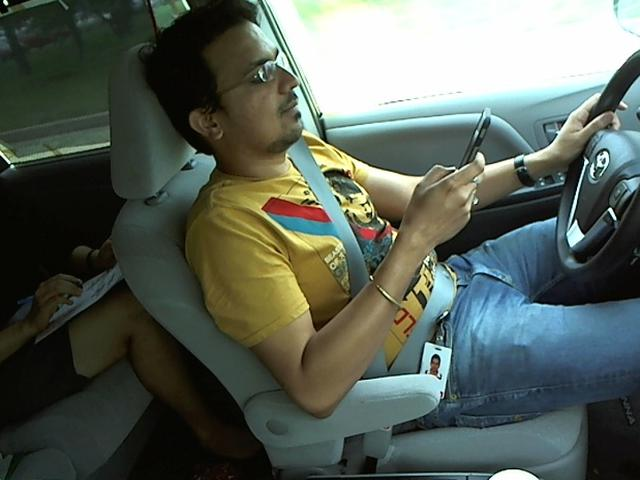

  Proba:
[ 0.0008  0.0962  0.1764  0.1791  0.1709  0.1019  0.0043  0.0014  0.1971
  0.0719]
  next best class: texting - left


Max Proba for cls: c9; desc: talking to passenger; proba: 0.9926; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_3293.jpg:


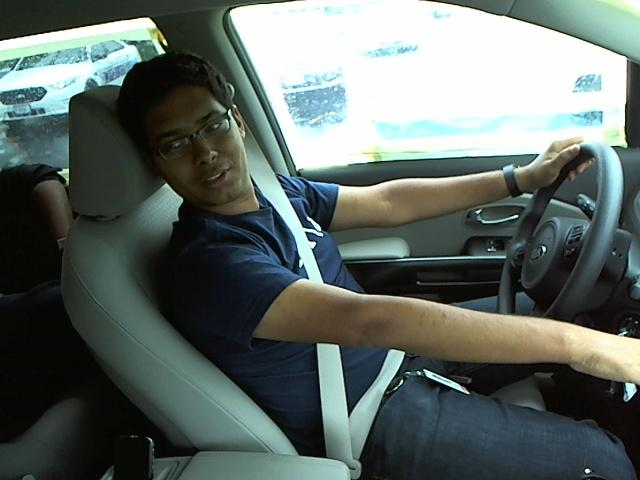

  Proba:
[ 0.0002  0.0001  0.0001  0.      0.      0.006   0.0006  0.0003  0.0001
  0.9926]
Min Proba for cls: c9; desc: talking to passenger; proba: 0.2081; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_28500.jpg:


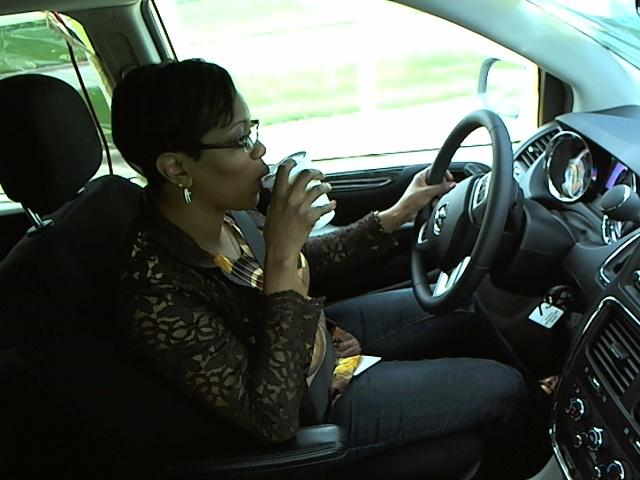

  Proba:
[ 0.171   0.1198  0.0902  0.0025  0.0023  0.0212  0.1943  0.0001  0.1905
  0.2081]
  next best class: drinking


In [262]:
for clsIx, cls in enumerate(glbRspClass):
    clsMsk = glbObsNewRspPred == clsIx
    clsObsNewRspPredProba = glbObsNewRspPredProba[clsMsk, :]
    clsObsNewIdn = [glbObsNewIdn[ixMsk] for ixMsk in xrange(len(glbObsNewIdn)) \
                    if clsMsk[ixMsk]]
    print '\n'
    
    maxClsProba = np.max(clsObsNewRspPredProba[:, clsIx])
    maxObsNewRspPredProba = clsObsNewRspPredProba[:, clsIx] == maxClsProba
    print 'Max Proba for cls: %s; desc: %s; proba: %0.4f; nObsNew: %d' % \
        (cls, glbRspClassDesc[cls], maxClsProba, maxObsNewRspPredProba.sum())
    imgFilePth = os.getcwd() + '/data/' + glbDataFile['newFoldersPth'] + '/' + \
                    clsObsNewIdn[np.argmax(clsObsNewRspPredProba[:, clsIx])]
    print '  %s:' % imgFilePth
    jpgfile = Image(imgFilePth, format = 'jpg', 
                        width = glbImgSz * 4, height = glbImgSz * 4)
    display(jpgfile)         
    print '  Proba:'; 
    print np.array_str(clsObsNewRspPredProba[np.argmax(clsObsNewRspPredProba[:, clsIx]), :],
                       precision=4, suppress_small=True)
        
    minClsProba = np.min(clsObsNewRspPredProba[:, clsIx])
    minObsNewRspPredProba = clsObsNewRspPredProba[:, clsIx] == minClsProba
    print 'Min Proba for cls: %s; desc: %s; proba: %0.4f; nObsNew: %d' % \
        (cls, glbRspClassDesc[cls], minClsProba, minObsNewRspPredProba.sum())
    imgFilePth = os.getcwd() + '/data/' + glbDataFile['newFoldersPth'] + '/' + \
                    clsObsNewIdn[np.argmin(clsObsNewRspPredProba[:, clsIx])]
    print '  %s:' % imgFilePth
    jpgfile = Image(imgFilePth, format = 'jpg', 
                        width = glbImgSz * 4, height = glbImgSz * 4)
    display(jpgfile)
    print '  Proba:'; 
    print np.array_str(clsObsNewRspPredProba[np.argmin(clsObsNewRspPredProba[:, clsIx]), :],
                       precision=4, suppress_small=True)
    thsObsNewRspPredProba = clsObsNewRspPredProba[np.argmin(clsObsNewRspPredProba[:, clsIx]), :]
    thsObsNewRspPredProba[clsIx] = 0
    print '  next best class: %s' % \
        (glbRspClassDesc[glbRspClass[np.argmax(thsObsNewRspPredProba)]])

### Output submission

In [265]:
sbmObsNewDf = pd.DataFrame(glbObsNewRspPredProba)
sbmObsNewDf.columns = glbRspClass
sbmObsNewDf['img'] = glbObsNewIdn
sbmObsNewDf = (sbmObsNewDf
                .set_index(['img'], 
                           drop = False)
                .sort_values('img')
                )
sbmObsNewDf = sbmObsNewDf[['img'] + glbRspClass]
print sbmObsNewDf.head()
print sbmObsNewDf.tail()

                           img        c0            c1        c2        c3  \
img                                                                          
img_1.jpg            img_1.jpg  0.000352  1.429899e-08  0.215615  0.000002   
img_10.jpg          img_10.jpg  0.000342  7.609543e-04  0.019768  0.487348   
img_100.jpg        img_100.jpg  0.898362  1.178963e-03  0.000397  0.010332   
img_1000.jpg      img_1000.jpg  0.059924  9.220102e-02  0.024118  0.000006   
img_100000.jpg  img_100000.jpg  0.000363  2.111714e-05  0.002980  0.058681   

                      c4        c5            c6        c7        c8        c9  
img                                                                             
img_1.jpg       0.000064  0.765132  1.848123e-02  0.000083  0.000003  0.000267  
img_10.jpg      0.001547  0.489842  1.124179e-07  0.000216  0.000098  0.000078  
img_100.jpg     0.004203  0.000130  1.713997e-04  0.000164  0.007060  0.078002  
img_1000.jpg    0.115853  0.000276  6.978249e-01

In [264]:
# print type(glbObsNewRspPredProba)
# print glbObsNewRspPredProba.head()
#print glbObsNewRspPredProba.columns
#print glbObsNewRspPredProba[0:3, :]

In [266]:
sbmObsNewDf.to_csv('img_02_fit_lgtRgr_SFDD_sbmt.csv', index = False)

In [267]:
print 'LeaderBoard metric for this submission: %0.5f' % (2.63892)

LeaderBoard metric for this submission: 2.63892


In [268]:
# glbObsVldRspPredProbaDf = \
#     pd.DataFrame(mdlFinDf['model'][0].predict_proba(np.reshape(glbObsVldFtr          , \
#                                                     (glbObsVldFtr.shape[0] , glbImgSz ** 2))))
# glbObsVldRspPredProbaDf.columns = glbRspClass
# glbObsVldRspPredProbaDf['img'] = glbObsVldIdn
# glbObsVldRspPredProbaDf = (glbObsVldRspPredProbaDf
#                 .set_index(['img'], 
#                            drop = False)
#                 .sort_values('img')
#                 )
# glbObsVldRspPredProbaDf = glbObsVldRspPredProbaDf[['img'] + glbRspClass]
# print glbObsVldRspPredProbaDf.head()
# print glbObsVldRspPredProbaDf.tail()

In [269]:
# tmpObsVldRspIndicator = np.zeros((glbObsVldRsp.shape[0], len(glbRspClass)))
# #print glbObsVldRsp[10]
# for cls in xrange(len(glbRspClass)):
#     tmpObsVldRspIndicator[glbObsVldRsp == cls, cls] = 1
    
# print np.unique(glbObsVldRsp, return_counts = True)
# print tmpObsVldRspIndicator.sum(axis = 0)
# print (tmpObsVldRspIndicator.sum(axis = 0) == np.unique(glbObsVldRsp, return_counts = True)[1])
# #tmpObsVldRspIndicator[glbObsVldRsp == 3, 3] = 1
# #tmpObsVldRspIndicator[0, glbObsVldRsp[0]]
# print tmpObsVldRspIndicator[10:16, :]

In [270]:
# glbObsVldRspPredProba = \
#     mdlFinDf['model'][0].predict_proba(np.reshape(glbObsVldFtr          , \
#                                                     (glbObsVldFtr.shape[0] , glbImgSz ** 2)))
# tmpObsVldRspPredProba = glbObsVldRspPredProba
# print tmpObsVldRspPredProba[10:16, :]    

In [271]:
# sclObsVldRspPredProbaRowSum = tmpObsVldRspPredProba.sum(axis = 1)
# # print np.abs(sclObsVldRspPredProbaRowSum - 1.0)[10:16]
# # print 1e-05
# # print np.abs(sclObsVldRspPredProbaRowSum - 1.0)[10:16] > 1e-05
# sclObsVldRspPredProbaRowSumChk = (np.abs(sclObsVldRspPredProbaRowSum - 1.0) > 1e-15)
# if (sclObsVldRspPredProbaRowSumChk.sum() > 0):
#     print 'row sums != 1 for %d obs' % (sclObsVldRspPredProbaRowSumChk.sum())
#     print sclObsVldRspPredProbaRowSum[sclObsVldRspPredProbaRowSumChk]
#     #print sclObsVldRspPredProbaRowSum[10:16]    
#     sclObsVldRspPredProba = tmpObsVldRspPredProba / sclObsVldRspPredProbaRowSum
#     tmpObsVldRspPredProba = sclObsVldRspPredProba

In [272]:
# bndObsVldRspPredProba = tmpObsVldRspPredProba
# bndObsVldRspPredProba[bndObsVldRspPredProba > 1-1e-15] = 1-1e-15
# bndObsVldRspPredProba[bndObsVldRspPredProba < 0+1e-15] = 0+1e-15
# #print bndObsVldRspPredProba[10:16, :]    
# nModProba = (tmpObsVldRspPredProba != bndObsVldRspPredProba).sum()
# if (nModProba > 0):
#     print 'minmax of probabilities modified %d cells' % (nModProba)
# tmpObsVldRspPredProba = bndObsVldRspPredProba    

In [273]:
# print (tmpObsVldRspIndicator * np.log(tmpObsVldRspPredProba))[10:16]

In [274]:
# logLossVld = 0 - ((tmpObsVldRspIndicator * np.log(tmpObsVldRspPredProba)).sum() / 
#                     glbObsVldFtr.shape[0])
# print 'logLossVld: %0.4f' % (logLossVld)